# 02 – Preprocessing & Feature Engineering
### Car Price Prediction Using Machine Learning
Group Assignment 02 - CCS3012 - Data Analytics  
Submission Date: 16th September 2025

---

### **Group 11**
-  **FC211034 - N.D. Samararathne Kodikara**
-  **FC211013 - N.W.V. Tharindu Pabasara**
-  **FC211025 - W.M.M.C.B. Wijesundara**



---

### **Supervisor**
**Ms. Dilmi Praveena**  
*Faculty of Computing*  
*University of Sri Jayewardenepura*

---



## 📌 Objectives

This notebook builds upon the cleaned dataset produced in **Notebook 01 — Data Exploration & Cleaning**.  
The focus here is on understanding the dataset more deeply, validating insights statistically, and preparing features for modeling.  

---

###  1. Descriptive Analytics  
- Summarize numerical variables.  
- Explore categorical variables.  
- Visualize distributions.  
- Examine bivariate relationships.  

###  2. Inferential Analytics  
- Perform hypothesis testing to assess whether differences between groups are statistically significant.  
- Check correlation strength and direction.  
- Identify potential multicollinearity issues between predictors.  

###  3. Feature Engineering  
- Create new features.  
- Extract useful info from text-based or categorical columns.  
- Handle skewed features.  
- Generate interaction terms if useful.  

###  4. Preprocessing Setup  
- Encode categorical variables.  
- Normalize/scale numerical features. 
- Standardize target variable if needed.  

###  5. Train/Test Split  
- Split dataset into **training** and **testing** sets for unbiased model evaluation.  
- Save processed datasets and transformation pipeline for **Notebook 03 — Modeling**.  



> By the end of this notebook, we will have a **fully processed dataset** with engineered and encoded features, ready for predictive modeling.  

---


### 📂 Input  
- `clean_data.csv` saved in `Data/processed/`  


### 📦 Output  


---

### 📊 Dataset Overview
**Dataset:** Car price dataset cleaned.  
**columns include**:   
- `id`, `price` (target variable),  `levy`,  `manufacturer`,  `model`,  `prod_year`,  `category`,  `leather_interior`,  `fuel_type`, `engine_volume`,  `mileage`,  `cylinders`,  `gear_box_type`,  `drive_wheels`,  `doors`,  `wheel`, `color`,  `airbags`,  `turbo` (derived in Notebook 01)


> **Dataset stats:** 19,237 rows × 19 features | Target variable: `price` | Problem type: Regression


## Setup & imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


# Statistical functions
from scipy import stats

from prettytable import PrettyTable # For creating formatted tables in the console.
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [2]:
# Next we load the cleaned dataset.
df = pd.read_csv("./Data/processed/clean_data.csv")

In [3]:
# Prints the first 5 rows of the DataFrame.
df.head()

,id,price,levy,manufacturer,model,prod_year,category,leather_interior,fuel_type,engine_volume,mileage,cylinders,gear_box_type,drive_wheels,doors,wheel,color,airbags,turbo
0,45654403,13328,1399.0,lexus,rx 450,2010,jeep,yes,hybrid,3.5,186005,6,automatic,4x4,04-may,left wheel,silver,12,False
1,44731507,16621,1018.0,chevrolet,equinox,2011,jeep,no,petrol,3.0,192000,6,tiptronic,4x4,04-may,left wheel,black,8,False
2,45774419,8467,0.0,honda,fit,2006,hatchback,no,petrol,1.3,200000,4,variator,front,04-may,right-hand drive,black,2,False
3,45769185,3607,862.0,ford,escape,2011,jeep,yes,hybrid,2.5,168966,4,automatic,4x4,04-may,left wheel,white,0,False
4,45809263,11726,446.0,honda,fit,2014,hatchback,yes,petrol,1.3,91901,4,automatic,front,04-may,left wheel,silver,4,False


In [4]:
# Prints the name of each column in the dataset, the number of non-null values it contains, and its data type.
def df_info(df):
    table = PrettyTable()
    table.field_names = ["Column", "Non-Null Count", "Dtype"]

    for col in df.columns:
        non_null_count = df[col].count()
        dtype = df[col].dtype
        table.add_row([col, non_null_count, dtype])

    print(table)

df_info(df)

+------------------+----------------+---------+
|      Column      | Non-Null Count |  Dtype  |
+------------------+----------------+---------+
|        id        |     15697      |  int64  |
|      price       |     15697      |  int64  |
|       levy       |     15697      | float64 |
|   manufacturer   |     15697      |  object |
|      model       |     15697      |  object |
|    prod_year     |     15697      |  int64  |
|     category     |     15697      |  object |
| leather_interior |     15697      |  object |
|    fuel_type     |     15697      |  object |
|  engine_volume   |     15697      | float64 |
|     mileage      |     15697      |  int64  |
|    cylinders     |     15697      |  int64  |
|  gear_box_type   |     15697      |  object |
|   drive_wheels   |     15697      |  object |
|      doors       |     15697      |  object |
|      wheel       |     15697      |  object |
|      color       |     15697      |  object |
|     airbags      |     15697      |  i

💡 **Observations:**  
- The data set appears unchanged and matches the previously saved version.

Le't start...

# Section 1: Descriptive Analytics

## Numerical Features
**Features to analyze: price, levy, mileage, engine_volume, cylinders, airbags, prod_year**

### Analyze `price`

In [5]:
# Summary statistics
price_stats = df['price'].describe()
print("Price Summary:\n", price_stats)

Price Summary:
 count    1.569700e+04
mean     2.028445e+04
std      2.108237e+05
min      1.000000e+00
25%      7.527000e+03
50%      1.426900e+04
75%      2.338900e+04
max      2.630750e+07
Name: price, dtype: float64


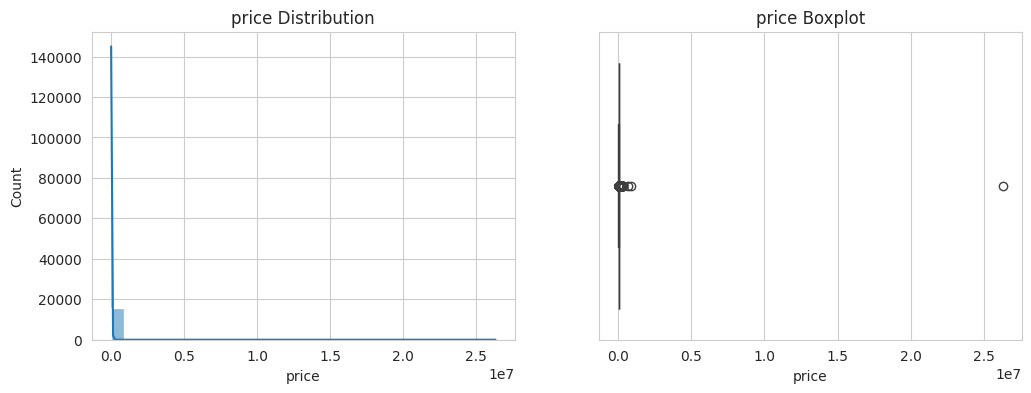

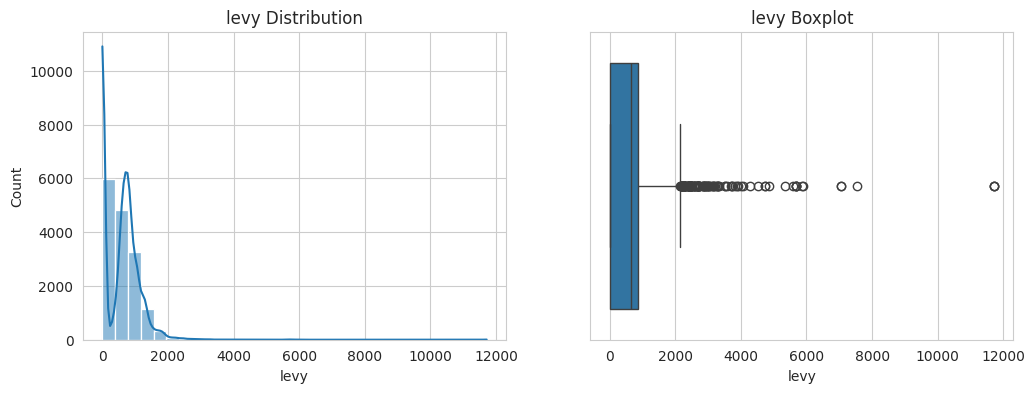

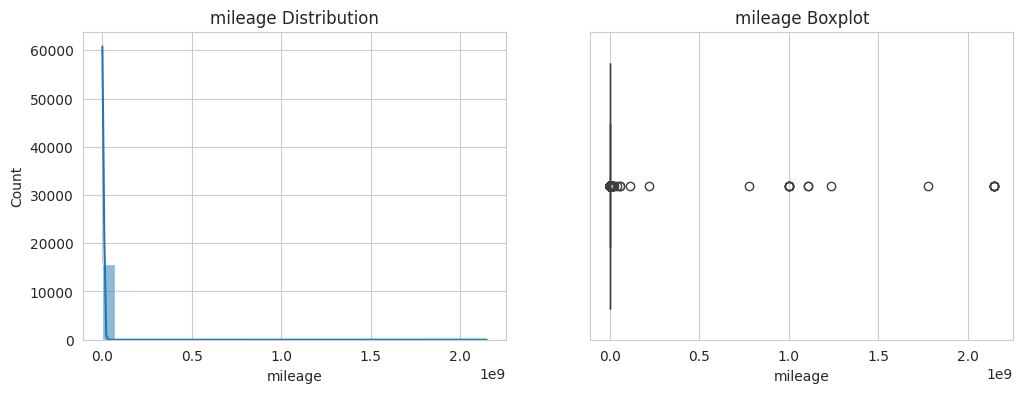

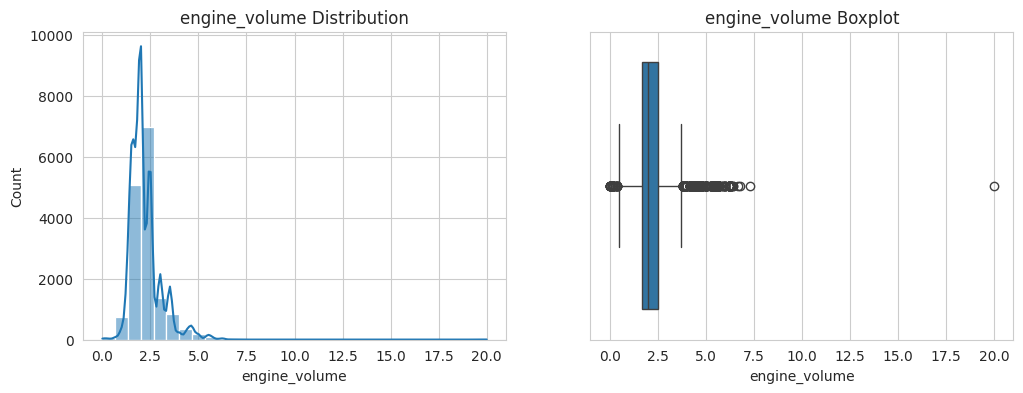

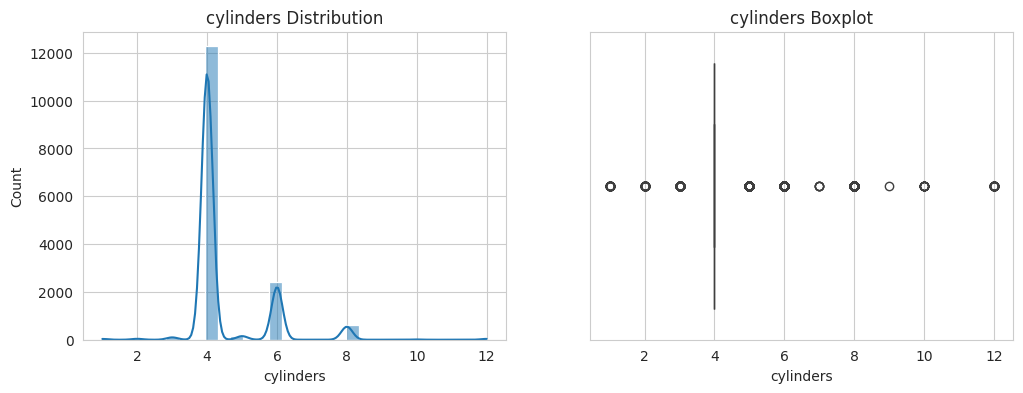

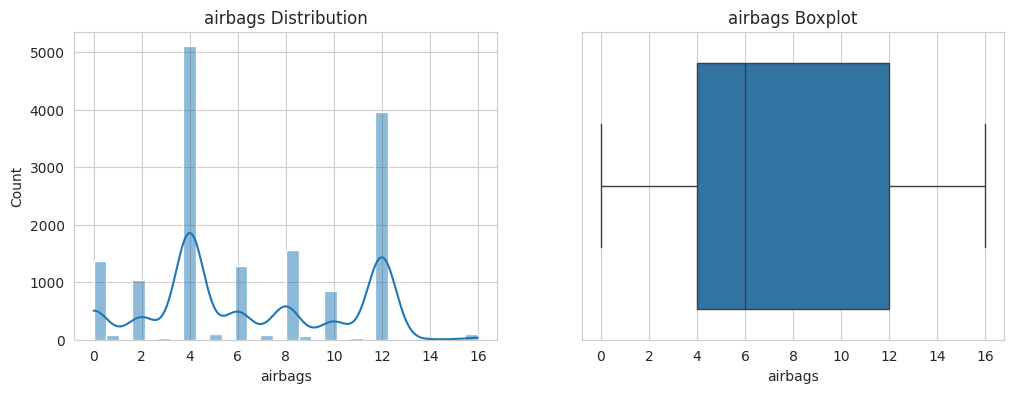

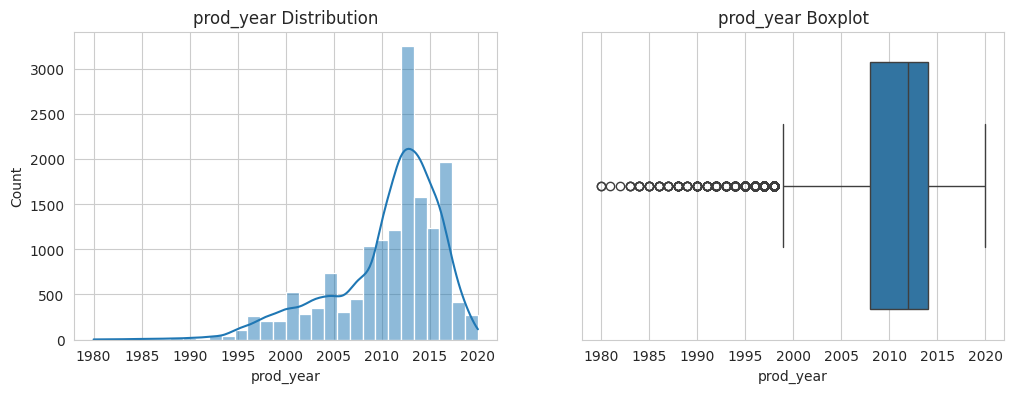

In [6]:
num_cols = ["price", "levy", "mileage", "engine_volume", "cylinders", "airbags", "prod_year"]

for col in num_cols:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[col], kde=True, bins=30, ax=axes[0])
    axes[0].set_title(f"{col} Distribution")
    
    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f"{col} Boxplot")
    
    plt.show()


## Catagorical Features
**Features to analyze: manufacturer,model,category,leather_interior,fuel_type,gear_box_type,drive_wheels,doors,wheel,color,turbo**

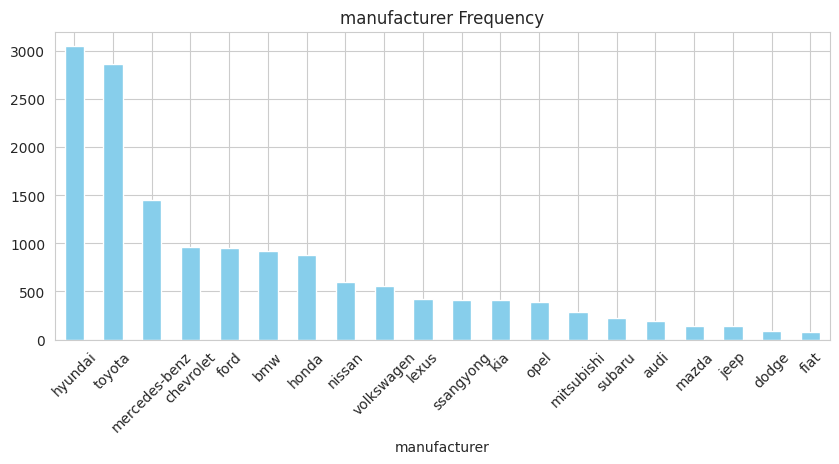

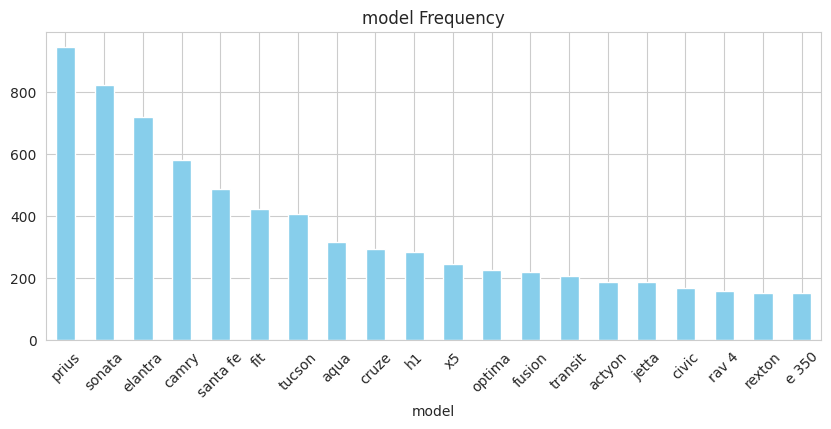

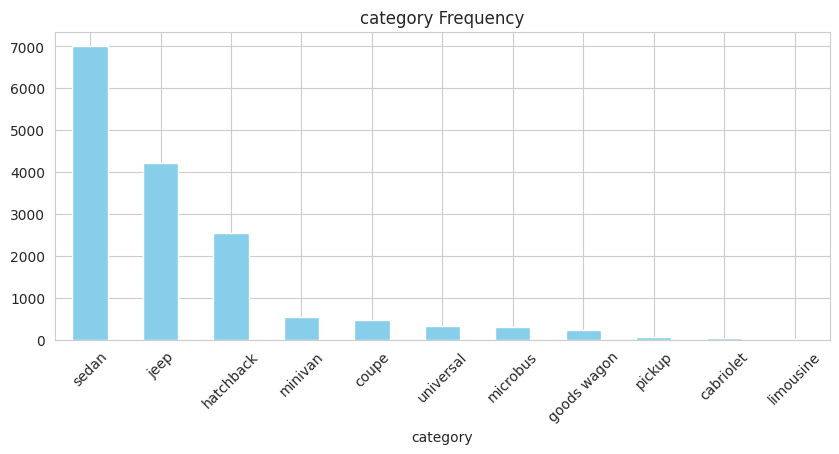

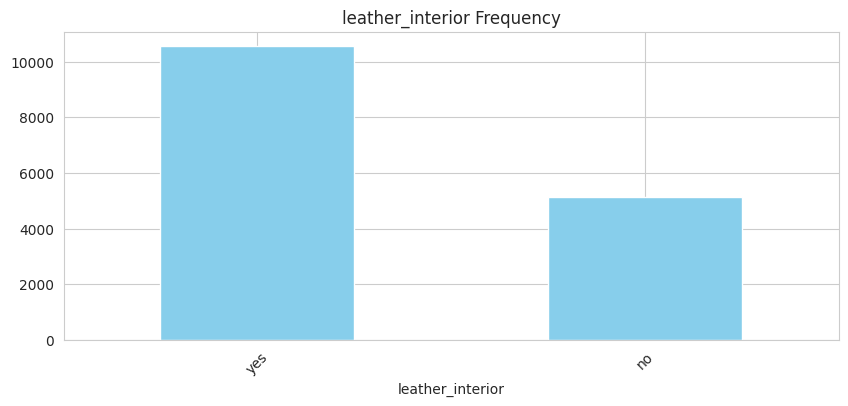

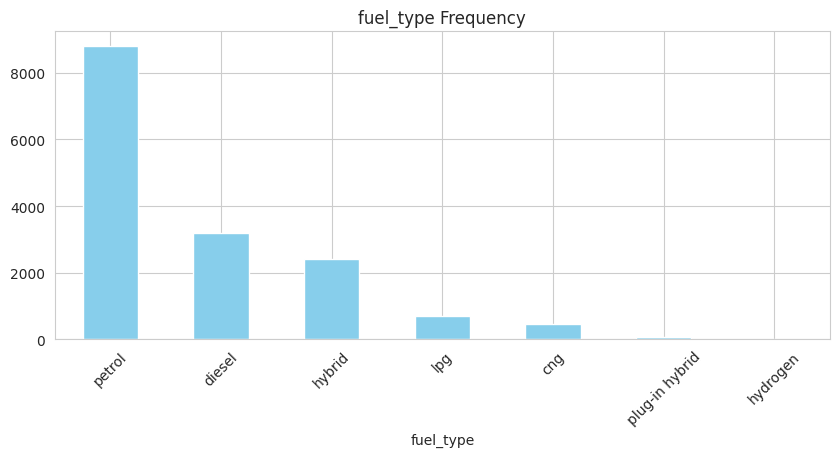

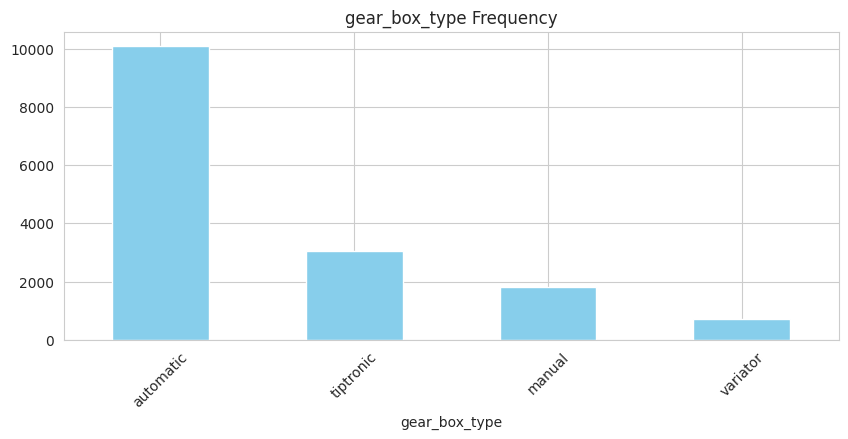

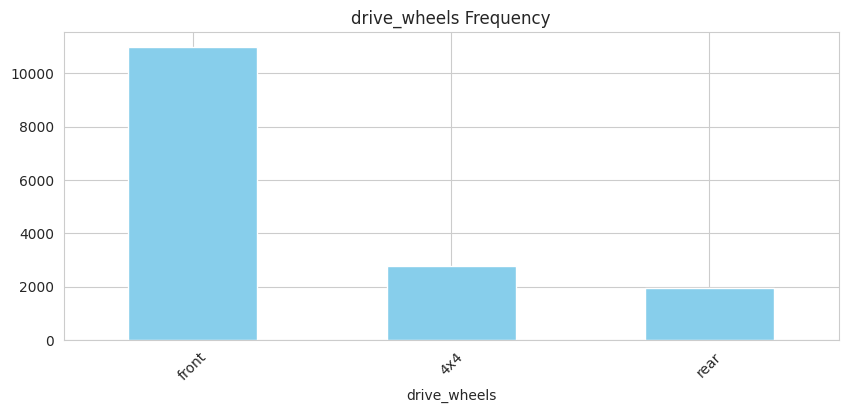

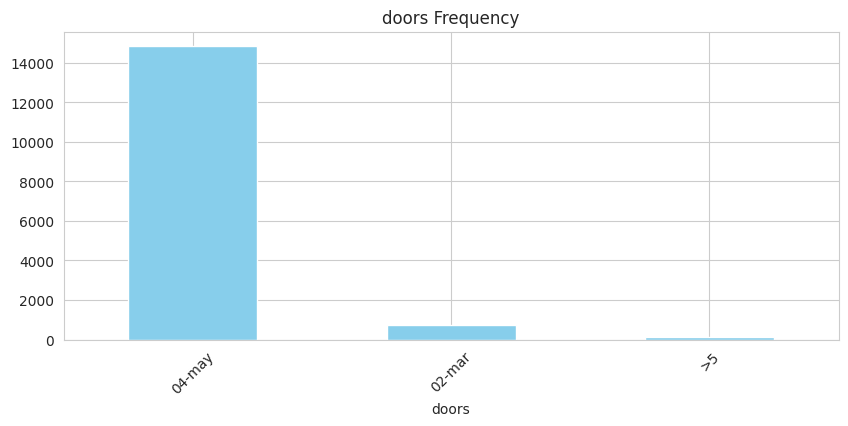

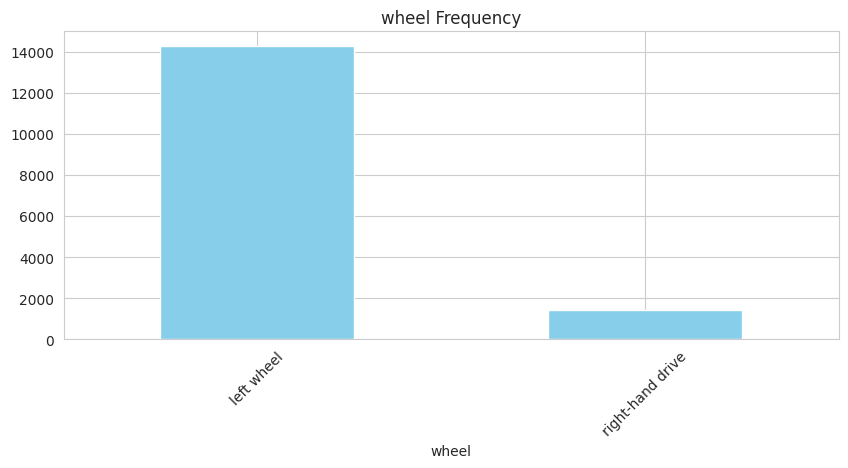

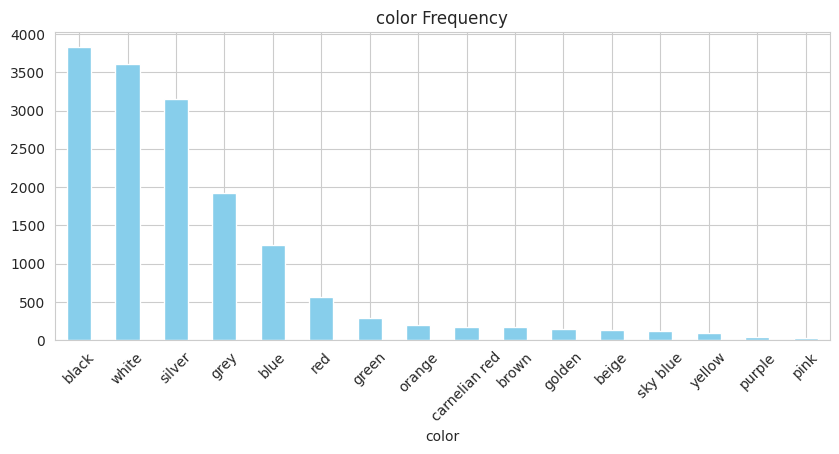

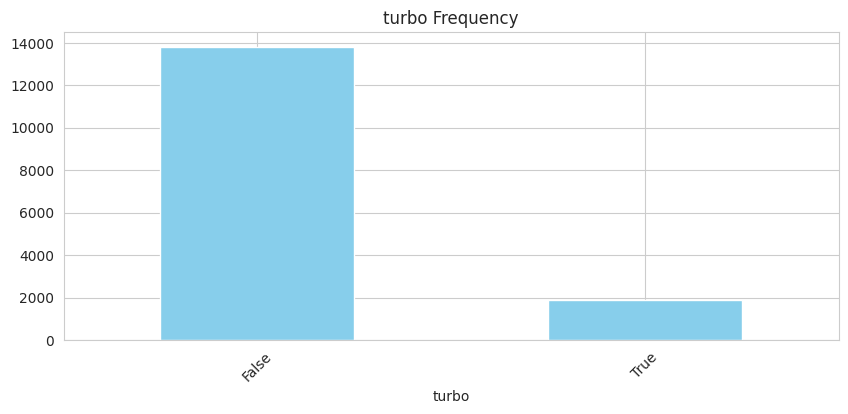

In [7]:
cat_cols = ["manufacturer","model","category","leather_interior","fuel_type",
            "gear_box_type","drive_wheels","doors","wheel","color","turbo"]

for col in cat_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind="bar", color="skyblue")
    plt.title(f"{col} Frequency")
    plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis
**This is used to identify relationship between two variables at the same time.**

This helps to answer the below questions: 
Does one variable affect or relate to another?
How strong is the relationship?
What kind of relationship exists?

This is importent because,
It shows dependencies and patterns,
It helps with feature selection,
It provides insights for feature engineering.

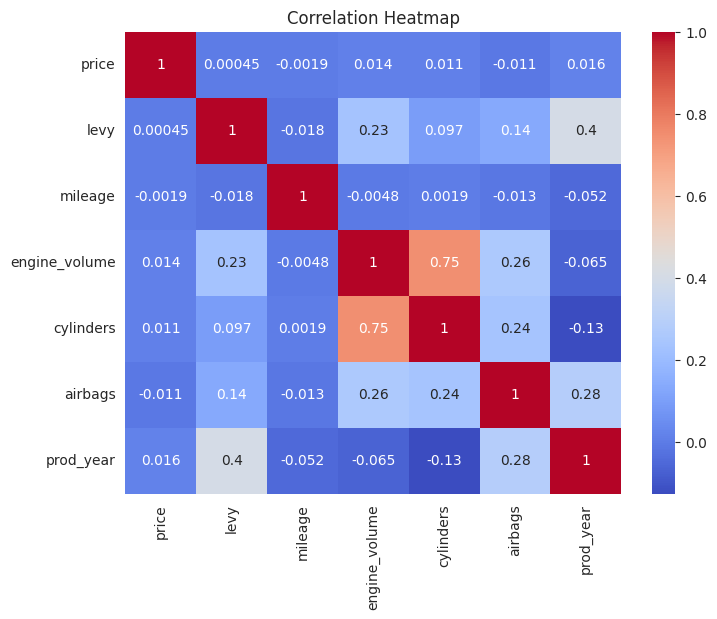

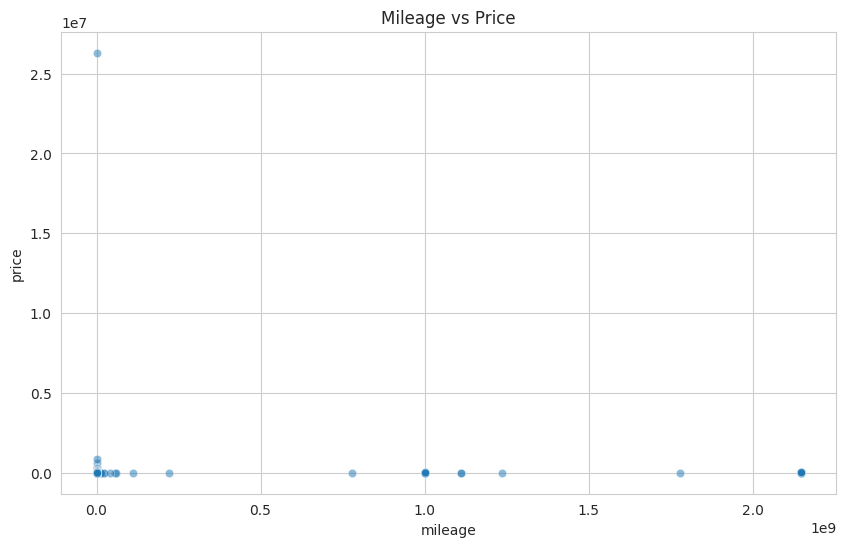

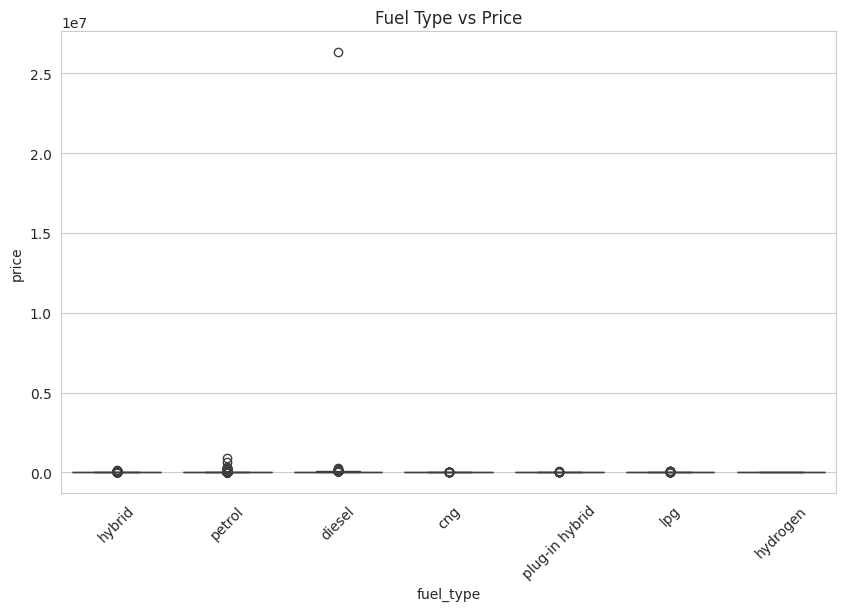

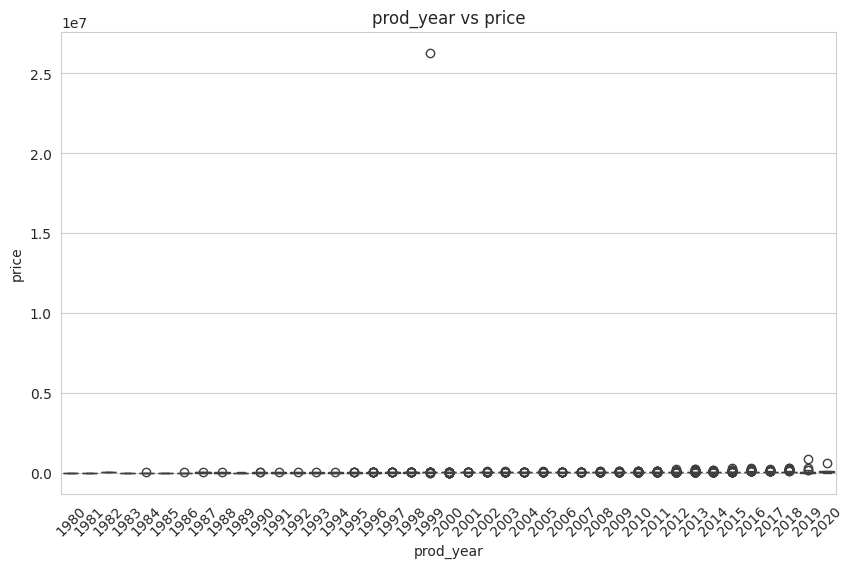

In [8]:
# Correlation heatmap (numerical vs numerical)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Example: scatter plot
sns.scatterplot(x="mileage", y="price", data=df, alpha=0.5)
plt.title("Mileage vs Price")
plt.show()

# Example: boxplot categorical vs price
sns.boxplot(x="fuel_type", y="price", data=df)
plt.title("Fuel Type vs Price")
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x="prod_year", y="price", data=df)
plt.title("prod_year vs price")
plt.xticks(rotation=45)
plt.show()



## Inferrential analysis

In [9]:
# ANOVA: price vs fuel_type
anova_result = stats.f_oneway(*[df.loc[df["fuel_type"]==ft, "price"] for ft in df["fuel_type"].unique()])
print("ANOVA (fuel_type vs price):", anova_result)

# Chi-square: turbo vs manufacturer
cont_table = pd.crosstab(df["turbo"], df["manufacturer"])
chi2, p, dof, ex = stats.chi2_contingency(cont_table)
print(f"Chi-square test: chi2={chi2:.2f}, p={p:.4f}")


ANOVA (fuel_type vs price): F_onewayResult(statistic=np.float64(3.37257981298027), pvalue=np.float64(0.0025251666124320137))
Chi-square test: chi2=2380.74, p=0.0000


## Outlier Detection

In [10]:
# Z-score method
z_scores = np.abs(stats.zscore(df[["price","mileage","levy","engine_volume","airbags"]]))
outliers = (z_scores > 3).any(axis=1)
print("Number of outliers:", outliers.sum())

# IQR method for price
Q1, Q3 = df["price"].quantile([0.25, 0.75])
IQR = Q3 - Q1
outlier_mask = (df["price"] < Q1 - 1.5*IQR) | (df["price"] > Q3 + 1.5*IQR)
print("Price outliers:", outlier_mask.sum())


Number of outliers: 381
Price outliers: 951


## Feature Engineering

With feature engineering we transform raw data into features that expose meaningful relationships while controlling noise and skewness. Well-designed features often add more predictive power than complex models alone.

We now add several derived columns that may improve model performance:

"car_age" – years since production.  
"price_per_mileage" – price divided by mileage (with 0 mileage handled).  
"turbo" – ensure it is truly binary.  
"leather_interior" – map Yes/No to 1/0.  
Group rare manufacturers/models as “Other”.  
"interaction_ev_turbo" – product of engine volume and turbo.  
Log / Box-Cox transforms for skewed numeric variables.

Reason:

**"car_age" – years since production.**
car_age = current_year − prod_year
Cars lose value as they get older. Using age instead of raw prod_year captures this depreciation effect directly and gives a variable where higher = older, which is easier for most algorithms.
**"price_per_mileage" – price divided by mileage (with 0 mileage handled).**
price_per_mileage = price ÷ mileage
Ties the car’s cost to its usage. A car with high mileage and high price may indicate premium quality, while low price per mileage could show heavy wear. It measures efficiency/value for money
**"turbo" – ensure it is truly binary.**
Turbocharged engines often increase performance and price, but the column may contain “Yes/No”, “1/0”, etc. Converting it to 0/1 ensures the model treats it as a clean categorical flag.
**"leather_interior" – map Yes/No to 1/0.**
Leather interiors are a luxury feature affecting price. Mapping “Yes/No” to 1/0 lets the algorithm learn its influence numerically.
**Group rare manufacturers/models as “Other”.**
High-cardinality columns (e.g., many manufacturers or models) with only a few samples per category can cause:
-Overfitting (model memorizes noise from rare groups).
-Sparse one-hot vectors.
Grouping infrequent values into a single "Other" stabilizes learning.
**"interaction_ev_turbo" – product of engine volume and turbo.**
interaction_ev_turbo = engine_volume × turbo
Engine volume and turbo may not just act separately; their combination (big engine + turbo) can strongly affect price. An interaction term allows the model to capture this synergy.
**Log / Box-Cox transforms for skewed numeric variables.**
These variables are often right-skewed. Skewness violates assumptions of many algorithms. 
Log or Box-Cox:
-Compresses extreme values.
-Makes distribution closer to normal.
-Improves stability and interpretability.


In [11]:
from scipy import stats

# --- 1. Car age ---
current_year = 2025   # or df['prod_year'].max() + 1
df['car_age'] = current_year - df['prod_year']

# --- 2. Price per mileage ---
df['price_per_mileage'] = df.apply(
    lambda r: r['price'] / r['mileage'] if r['mileage'] > 0 else r['price'],
    axis=1
)

# --- 3. Turbo flag ---
df['turbo'] = df['turbo'].apply(lambda x: 1 if str(x).lower() in ['yes','true','1'] else 0)

# --- 4. Leather interior binary ---
df['leather_interior'] = df['leather_interior'].map({'Yes':1, 'No':0}).fillna(0)

# --- 5. Rare categories ---
threshold = 50
rare_manu = df['manufacturer'].value_counts()
rare_manu = rare_manu[rare_manu < threshold].index
df['manufacturer_grouped'] = df['manufacturer'].replace(rare_manu, 'Other')

rare_model = df['model'].value_counts()
rare_model = rare_model[rare_model < threshold].index
df['model_grouped'] = df['model'].replace(rare_model, 'Other')

# --- 6. Interaction: engine_volume × turbo ---
df['interaction_ev_turbo'] = df['engine_volume'] * df['turbo']

# --- 7. Log / Box-Cox transforms ---
for col in ['price', 'levy', 'mileage']:
    if (df[col] > 0).all():
        # Box-Cox works only with strictly positive data
        transformed, lmbda = stats.boxcox(df[col])
        df[f'{col}_boxcox'] = transformed
        print(f"{col}: Box-Cox λ = {lmbda:.3f}")
    else:
        df[f'{col}_log'] = np.log1p(df[col].clip(lower=0))

price: Box-Cox λ = 0.283


## Preprocessing Pipeline

Now we encode categorical variables, scale numerics, and prepare the dataset for modeling.
python. Preprocessing converts a mixed, messy table (strings, large numbers, missing values) into a uniform numeric matrix that algorithms understand. It also protects against leakage. 

In [12]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# ----- Categorical encoding -----
categorical_ohe = ['fuel_type', 'gear_box_type', 'drive_wheels', 'doors', 'color']
df = pd.get_dummies(df, columns=categorical_ohe, drop_first=True)

# Label-encode high-cardinality variables
le = LabelEncoder()
for col in ['manufacturer_grouped', 'model_grouped']:
    df[col] = le.fit_transform(df[col])

# ----- Scaling -----
scaler = StandardScaler()
num_cols = ['price', 'mileage', 'engine_volume', 'levy', 'car_age', 'price_per_mileage']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Cylinders & airbags: keep raw (optionally scale)
# df[['cylinders','airbags']] = scaler.fit_transform(df[['cylinders','airbags']])

# ----- Save processed dataset -----
df.to_csv("processed_cars_dataset.csv", index=False)
print("Dataset preprocessed and saved to processed_cars_dataset.csv")

Dataset preprocessed and saved to processed_cars_dataset.csv
